# Importando bibliotecas e dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Leitura arquivo ARFF
from scipy.io import arff

In [ ]:
data = arff.loadarff('dataset_28_optdigits.arff')

In [ ]:
dataset = pd.DataFrame(data[0])

# Observando o dataset

Este dataset contém dados para o reconhecimento óptico de dígitos manuscritos, onde cada exemplo é representado por uma matriz de 8x8 pixels.

In [ ]:
dataset.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
0,0.0,1.0,6.0,15.0,12.0,1.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,6.0,14.0,7.0,1.0,0.0,0.0,b'0'
1,0.0,0.0,10.0,16.0,6.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,10.0,16.0,15.0,3.0,0.0,0.0,b'0'
2,0.0,0.0,8.0,15.0,16.0,13.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,9.0,14.0,0.0,0.0,0.0,0.0,b'7'
3,0.0,0.0,0.0,3.0,11.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,2.0,0.0,0.0,b'4'
4,0.0,0.0,5.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,14.0,7.0,0.0,0.0,b'6'


In [ ]:
dataset.shape

(5620, 65)

In [ ]:
# Coluna com as features
target_col = "class"
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset[target_col].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" % dataset.shape[0])
print("\nQuantas features existem no dataset?\n%d" % (dataset.shape[1]-1))
print("\nQue features são essas?\n%s" % (str([k for k in dataset.keys() if k != target_col])))
print("\nQual o numero de instâncias por classe?")
print(dataset[target_col].value_counts())

Quantas classes existem nesse dataset?
10

Quantas instâncias existem no dataset?
5620

Quantas features existem no dataset?
64

Que features são essas?
['input1', 'input2', 'input3', 'input4', 'input5', 'input6', 'input7', 'input8', 'input9', 'input10', 'input11', 'input12', 'input13', 'input14', 'input15', 'input16', 'input17', 'input18', 'input19', 'input20', 'input21', 'input22', 'input23', 'input24', 'input25', 'input26', 'input27', 'input28', 'input29', 'input30', 'input31', 'input32', 'input33', 'input34', 'input35', 'input36', 'input37', 'input38', 'input39', 'input40', 'input41', 'input42', 'input43', 'input44', 'input45', 'input46', 'input47', 'input48', 'input49', 'input50', 'input51', 'input52', 'input53', 'input54', 'input55', 'input56', 'input57', 'input58', 'input59', 'input60', 'input61', 'input62', 'input63', 'input64']

Qual o numero de instâncias por classe?
class
b'3'    572
b'1'    571
b'4'    568
b'7'    566
b'9'    562
b'6'    558
b'5'    558
b'2'    557
b'0'    

## Plotando a primeira imagem

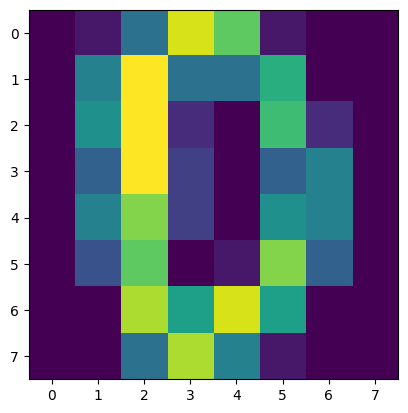

In [ ]:
firstimage = dataset.iloc[0, :64].astype(float).to_numpy().reshape(8, 8)
plt.imshow(firstimage)

# Separando o conjunto de dados

In [ ]:
# Atributos (features)
X = dataset.drop('class', axis=1)

# Rótulos de classe (target)
y = dataset['class'].apply(lambda x: int(x.decode('utf-8')))

# Separando o conjunto de dados em treino+validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Distribuição das classes - Dispersão com PCA
O PCA transforma os dados originais de alta dimensão em um espaço de menor dimensão (neste caso, duas dimensões), tentando capturar o máximo de variação possível nos dados. As duas novas dimensões (Componentes Principais 1 e 2) são combinações lineares das features originais.

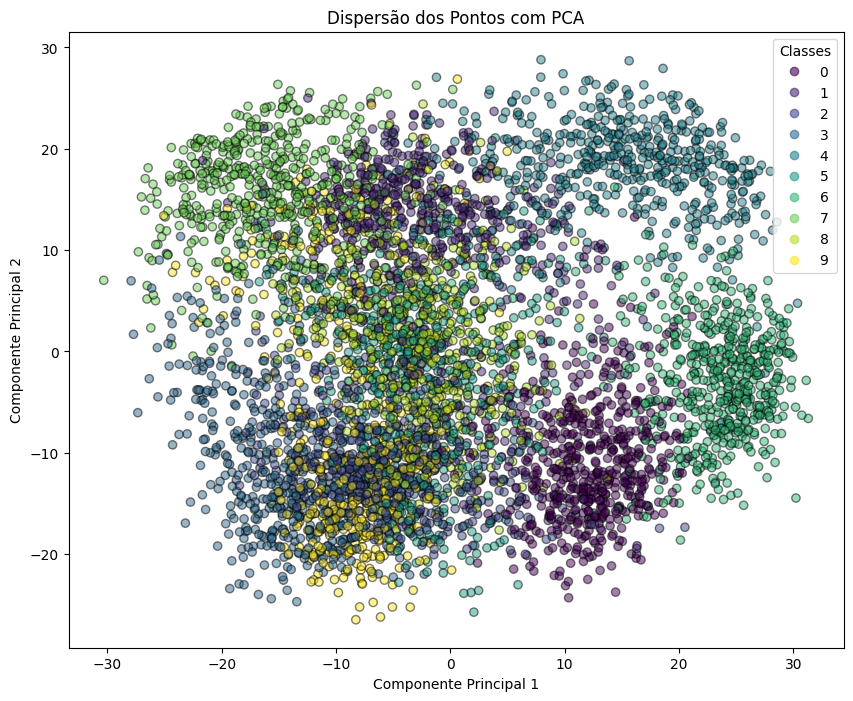

In [ ]:
from sklearn.decomposition import PCA

# Aplicando PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotando os pontos com cores diferentes para cada classe
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5, edgecolor='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Dispersão dos Pontos com PCA')

# Adicionando a legenda
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, labels, title="Classes", loc="best")

plt.show()

# Validação cruzada de 10-fold
Modelos: kNN, Decision Tree (DT), Multi-Layer Perceptron (MLP), Naive Bayes (NB) e Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Definindo os modelos
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(max_iter=300),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True)
}

# Definindo as métricas a serem avaliadas
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro', 'roc_auc_ovr']

# Variáveis para armazenar os resultados
scores = {}

# Realizando a validação cruzada de 10-fold para cada modelo
for name, model in models.items():
    print(f"Avaliando modelo: {name}")
    # cross_validate retorna um dicionário com as métricas de cada fold
    cv_results = cross_validate(model, X_train_val, y_train_val, cv=10, scoring=scoring)

    # Armazenando os resultados
    scores[name] = cv_results
    print(f"Média da acurácia: {cv_results['test_accuracy'].mean():.4f}, Desvio padrão: {cv_results['test_accuracy'].std():.4f}")
    print(f"Média do f1-score: {cv_results['test_f1_macro'].mean():.4f}, Desvio padrão: {cv_results['test_f1_macro'].std():.4f}")
    print(f"Média da precisão: {cv_results['test_precision_macro'].mean():.4f}, Desvio padrão: {cv_results['test_precision_macro'].std():.4f}")
    print(f"Média do recall: {cv_results['test_recall_macro'].mean():.4f}, Desvio padrão: {cv_results['test_recall_macro'].std():.4f}")
    print(f"Média da AUC: {cv_results['test_roc_auc_ovr'].mean():.4f}, Desvio padrão: {cv_results['test_roc_auc_ovr'].std():.4f}\n")

# A avaliação final deve ser feita com o conjunto de teste (X_test, y_test) com o modelo final escolhido

Avaliando modelo: KNN
Média da acurácia: 0.9849, Desvio padrão: 0.0058
Média do f1-score: 0.9849, Desvio padrão: 0.0058
Média da precisão: 0.9854, Desvio padrão: 0.0057
Média do recall: 0.9849, Desvio padrão: 0.0058
Média da AUC: 0.9980, Desvio padrão: 0.0022

Avaliando modelo: Decision Tree
Média da acurácia: 0.8966, Desvio padrão: 0.0198
Média do f1-score: 0.8963, Desvio padrão: 0.0200
Média da precisão: 0.8979, Desvio padrão: 0.0196
Média do recall: 0.8966, Desvio padrão: 0.0199
Média da AUC: 0.9425, Desvio padrão: 0.0110

Avaliando modelo: MLP
Média da acurácia: 0.9855, Desvio padrão: 0.0056
Média do f1-score: 0.9856, Desvio padrão: 0.0056
Média da precisão: 0.9859, Desvio padrão: 0.0056
Média do recall: 0.9856, Desvio padrão: 0.0056
Média da AUC: 0.9997, Desvio padrão: 0.0002

Avaliando modelo: Naive Bayes
Média da acurácia: 0.8087, Desvio padrão: 0.0306
Média do f1-score: 0.8125, Desvio padrão: 0.0296
Média da precisão: 0.8583, Desvio padrão: 0.0166
Média do recall: 0.8097, Desvi

# Busca pelos melhores hiperparâmetros - RandomSearchCV (melhor custo computacional)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform

# Definindo os modelos e os hiperparâmetros para RandomSearchCV
param_distributions = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': randint(1, 20),
            'weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': randint(1, 50)
        }
    },
    'MLP': {
        'model': MLPClassifier(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50,50)],
            'activation': ['tanh', 'relu'],
            'solver': ['adam', 'sgd']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(-9, -1, 10)
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'C': uniform(0.1, 10),
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Armazenando os melhores modelos e parâmetros
best_models = {}
scores = {}

# Loop para treinar e avaliar os modelos
for model_name, model_info in param_distributions.items():
    print(f"Avaliando modelo: {model_name}")
    random_search = RandomizedSearchCV(model_info['model'], model_info['params'],
                                       n_iter=10, cv=10, scoring='accuracy', random_state=42)
    random_search.fit(X_train_val, y_train_val)  # Usando os dados de treinamento

    # Armazenando o melhor modelo
    best_models[model_name] = random_search.best_estimator_

    # Resultados da validação cruzada
    cv_scores = cross_val_score(best_models[model_name], X_train_val, y_train_val, cv=10)  # Usando os dados de treinamento
    scores[model_name] = {
        'accuracy': cv_scores.mean(),
        'std_dev': cv_scores.std(),
        'best_params': random_search.best_params_
    }

    print(f"Melhores parâmetros: {random_search.best_params_}")
    print(f"Média da acurácia: {cv_scores.mean():.4f}, Desvio padrão: {cv_scores.std():.4f}\n")

# Acessando as métricas
for model_name, metrics in scores.items():
    print(f"Modelo: {model_name}")
    print(f"Melhores Parâmetros: {metrics['best_params']}")
    print(f"Acurácia Média: {metrics['accuracy']:.4f}")
    print(f"Desvio Padrão da Acurácia: {metrics['std_dev']:.4f}")
    print("-" * 30)

Avaliando modelo: KNN
Melhores parâmetros: {'n_neighbors': 3, 'weights': 'distance'}
Média da acurácia: 0.9869, Desvio padrão: 0.0056

Avaliando modelo: Decision Tree
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 24}
Média da acurácia: 0.9028, Desvio padrão: 0.0089

Avaliando modelo: MLP


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'solver': 'adam', 'hidden_layer_sizes': (100,), 'activation': 'relu'}
Média da acurácia: 0.9818, Desvio padrão: 0.0051

Avaliando modelo: Naive Bayes
Melhores parâmetros: {'var_smoothing': 0.1}
Média da acurácia: 0.9288, Desvio padrão: 0.0171

Avaliando modelo: SVM
Melhores parâmetros: {'C': 5.347746602583891, 'gamma': 'scale', 'kernel': 'rbf'}
Média da acurácia: 0.9915, Desvio padrão: 0.0043

Modelo: KNN
Melhores Parâmetros: {'n_neighbors': 3, 'weights': 'distance'}
Acurácia Média: 0.9869
Desvio Padrão da Acurácia: 0.0056
------------------------------
Modelo: Decision Tree
Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 24}
Acurácia Média: 0.9028
Desvio Padrão da Acurácia: 0.0089
------------------------------
Modelo: MLP
Melhores Parâmetros: {'solver': 'adam', 'hidden_layer_sizes': (100,), 'activation': 'relu'}
Acurácia Média: 0.9818
Desvio Padrão da Acurácia: 0.0051
------------------------------
Modelo: Naive Bayes
Melhores Parâmetros: {'var_smooth

## Guardando os melhores hiperparâmetros após Randomized

In [ ]:
# Melhores hiperparâmetros obtidos após o RandomizedSearchCV
best_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=24)
best_mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(100,), activation='relu', max_iter=1000)
best_nb = GaussianNB(var_smoothing=0.1)
best_svm = SVC(C=5.347746602583891, gamma='scale', kernel='rbf', probability=True)

# Dicionário para armazenar os melhores modelos
best_models = {
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'MLP': best_mlp,
    'Naive Bayes': best_nb,
    'SVM': best_svm
}

# Treinando os melhores modelos com o conjunto de treino e validação


In [ ]:
for model_name, model in best_models.items():
    model.fit(X_train_val, y_train_val)

# Avaliação com o Conjunto de Teste

Modelo: KNN
Acurácia: 0.9911
F1-Score: 0.9911
Precisão: 0.9912
Recall: 0.9911
AUC: 0.9971
Matriz de Confusão:
[[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   0   0   0]
 [  0   0   0 115   0   1   0   0   0   2]
 [  0   0   0   0 116   0   1   0   0   0]
 [  0   0   0   0   0  96   0   0   0   1]
 [  0   1   0   0   0   0 122   0   0   0]
 [  0   1   0   0   0   0   0 123   0   0]
 [  0   1   0   0   0   0   0   0 104   0]
 [  0   0   0   1   0   0   0   1   0 121]]



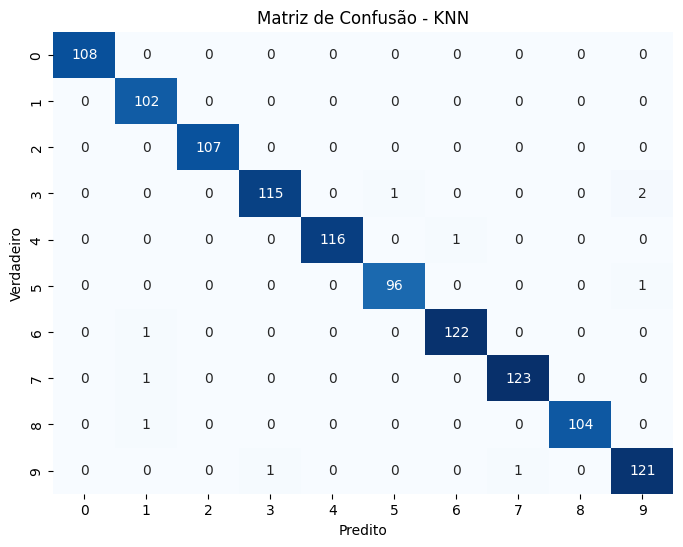

Modelo: Decision Tree
Acurácia: 0.9146
F1-Score: 0.9144
Precisão: 0.9148
Recall: 0.9146
AUC: 0.9520
Matriz de Confusão:
[[102   0   2   0   1   0   1   1   1   0]
 [  0  94   4   0   0   0   1   2   0   1]
 [  0   0 102   2   0   0   1   0   1   1]
 [  1   0   0 107   1   2   0   1   2   4]
 [  1   1   0   0 109   0   2   0   3   1]
 [  0   1   0   8   0  84   0   0   2   2]
 [  1   1   1   0   2   0 116   0   2   0]
 [  0   0   0   2   2   0   1 119   0   0]
 [  1   6   2   3   0   1   0   2  88   2]
 [  1   1   1   1   1   4   0   6   1 107]]



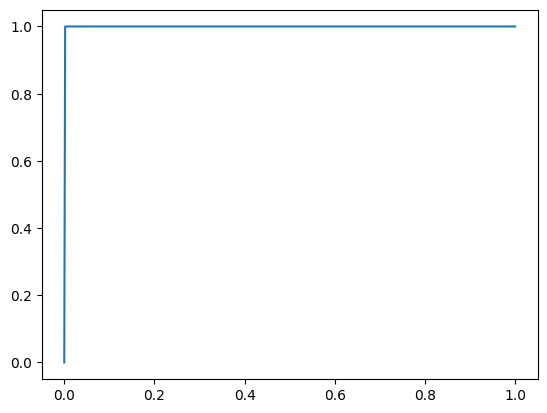

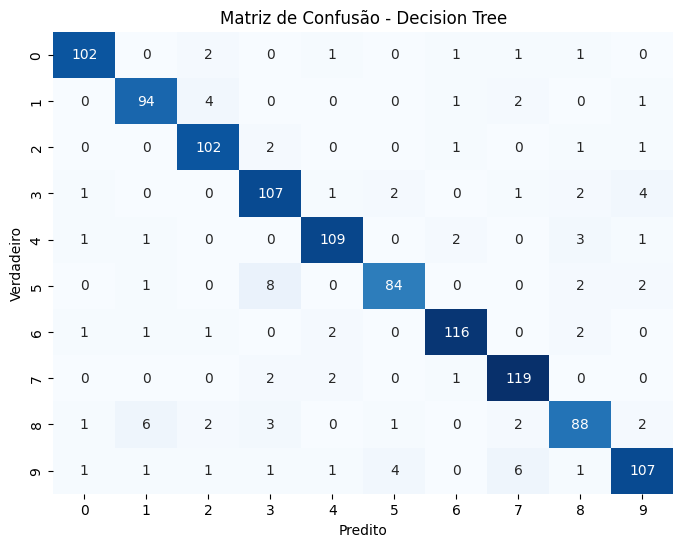

Modelo: MLP
Acurácia: 0.9769
F1-Score: 0.9769
Precisão: 0.9771
Recall: 0.9769
AUC: 0.9996
Matriz de Confusão:
[[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   1]
 [  0   0   0 115   0   3   0   0   0   0]
 [  0   0   0   0 114   0   2   0   0   1]
 [  0   0   0   1   0  94   0   0   0   2]
 [  1   2   0   0   1   0 119   0   0   0]
 [  0   1   0   0   0   0   0 123   0   0]
 [  0   2   0   0   0   0   0   1 102   0]
 [  0   2   0   1   1   1   0   0   3 115]]



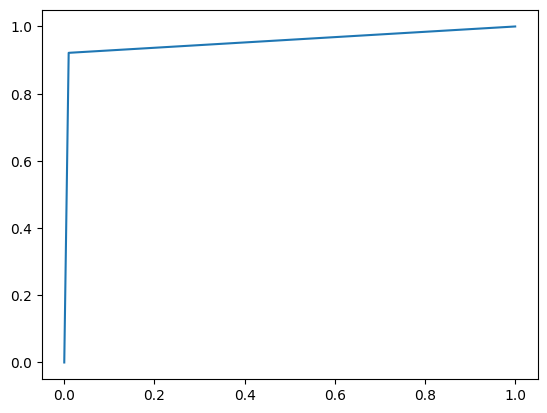

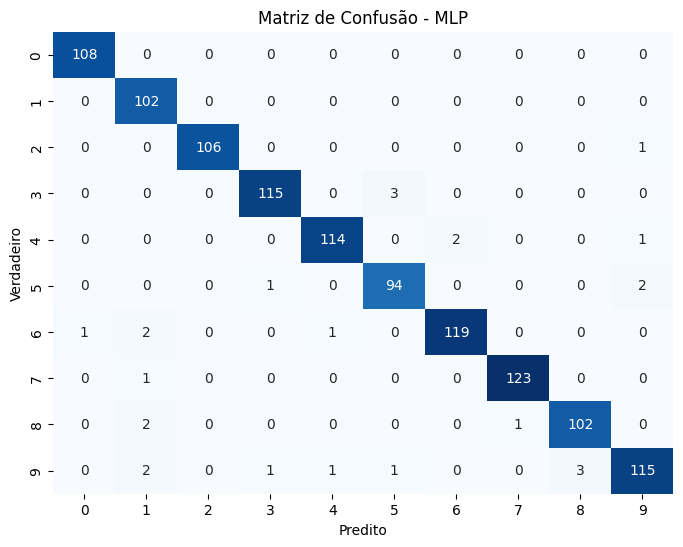

Modelo: Naive Bayes
Acurácia: 0.9244
F1-Score: 0.9249
Precisão: 0.9267
Recall: 0.9244
AUC: 0.9941
Matriz de Confusão:
[[105   0   0   0   2   0   0   0   1   0]
 [  0  90   1   0   0   0   3   0   2   6]
 [  0   3  94   0   0   0   0   0   9   1]
 [  0   0   0 109   0   2   0   1   3   3]
 [  0   0   0   0 108   0   2   3   2   2]
 [  0   0   1   1   1  87   0   0   1   6]
 [  0   2   0   0   0   0 121   0   0   0]
 [  0   0   0   0   0   0   0 123   0   1]
 [  0   6   1   0   1   1   0   0  93   3]
 [  0   2   0   6   2   0   0   1   3 109]]



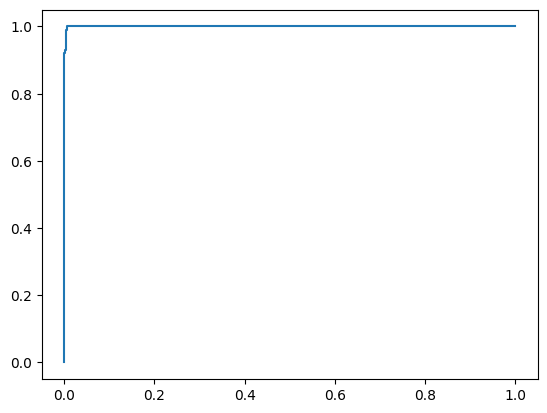

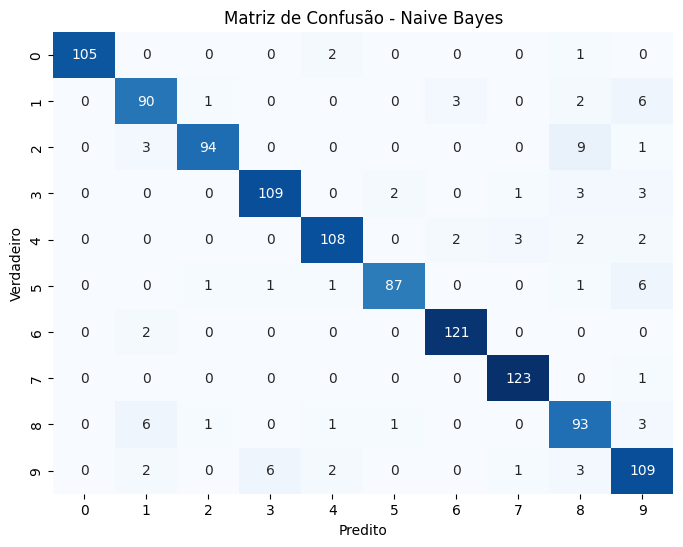

Modelo: SVM
Acurácia: 0.9947
F1-Score: 0.9946
Precisão: 0.9947
Recall: 0.9947
AUC: 1.0000
Matriz de Confusão:
[[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   0   0   0]
 [  0   0   0 117   0   1   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0]
 [  0   0   0   0   0  97   0   0   0   0]
 [  0   1   0   0   0   0 122   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0 105   0]
 [  0   0   0   2   0   1   0   1   0 119]]



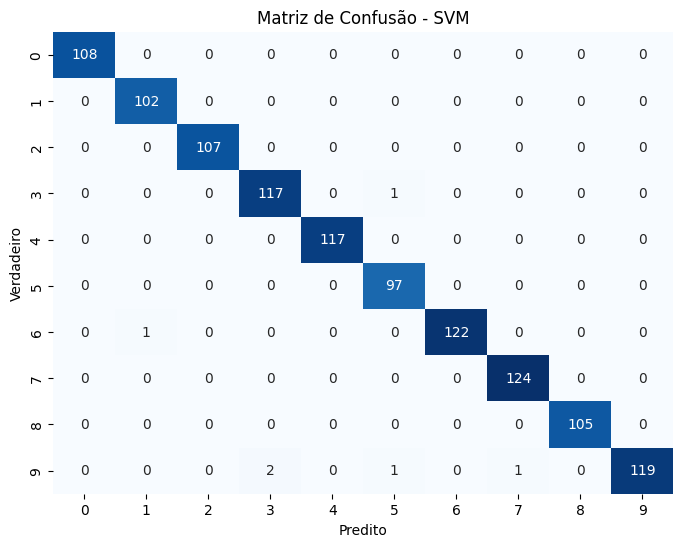

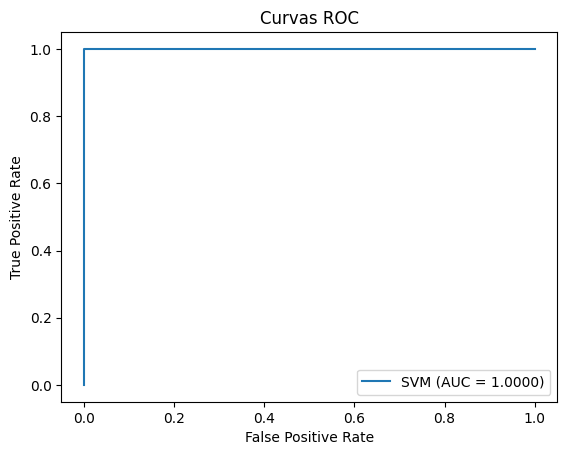

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário para armazenar as métricas finais
final_scores = {}

# Avaliando cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    conf_matrix = confusion_matrix(y_test, y_pred)

    final_scores[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc,
        'conf_matrix': conf_matrix
    }

    print(f"Modelo: {model_name}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print(f"Matriz de Confusão:\n{conf_matrix}\n")

    # Plotando a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

    # Plotando a curva ROC
    if model_name != 'Naive Bayes':  # NB não suporta predict_proba na mesma forma para multiclass
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend(loc='best')
plt.show()

# Criando um DataFrame com os resultados finais

In [ ]:
results_df = pd.DataFrame.from_dict(final_scores, orient='index')
results_df = results_df[['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc']]
print(results_df)

               accuracy  f1_score  precision    recall   roc_auc
KNN            0.991103  0.991112   0.991186  0.991103  0.997095
Decision Tree  0.914591  0.914355   0.914810  0.914591  0.951974
MLP            0.976868  0.976858   0.977133  0.976868  0.999599
Naive Bayes    0.924377  0.924887   0.926674  0.924377  0.994149
SVM            0.994662  0.994649   0.994729  0.994662  0.999964


# Avaliação com o conjunto de teste e cálculo das métricas **por classe**:

Relatório de Classificação - KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.97      1.00      0.99       102
           2       1.00      1.00      1.00       107
           3       0.99      0.97      0.98       118
           4       1.00      0.99      1.00       117
           5       0.99      0.99      0.99        97
           6       0.99      0.99      0.99       123
           7       0.99      0.99      0.99       124
           8       1.00      0.99      1.00       105
           9       0.98      0.98      0.98       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



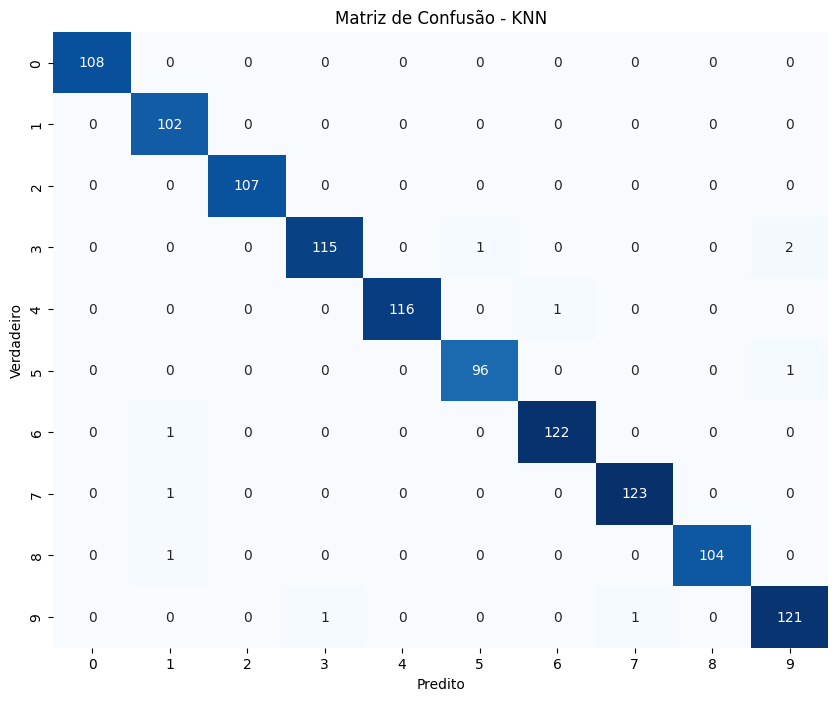

Relatório de Classificação - Decision Tree:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.90      0.92      0.91       102
           2       0.91      0.95      0.93       107
           3       0.87      0.91      0.89       118
           4       0.94      0.93      0.94       117
           5       0.92      0.87      0.89        97
           6       0.95      0.94      0.95       123
           7       0.91      0.96      0.93       124
           8       0.88      0.84      0.86       105
           9       0.91      0.87      0.89       123

    accuracy                           0.91      1124
   macro avg       0.91      0.91      0.91      1124
weighted avg       0.91      0.91      0.91      1124



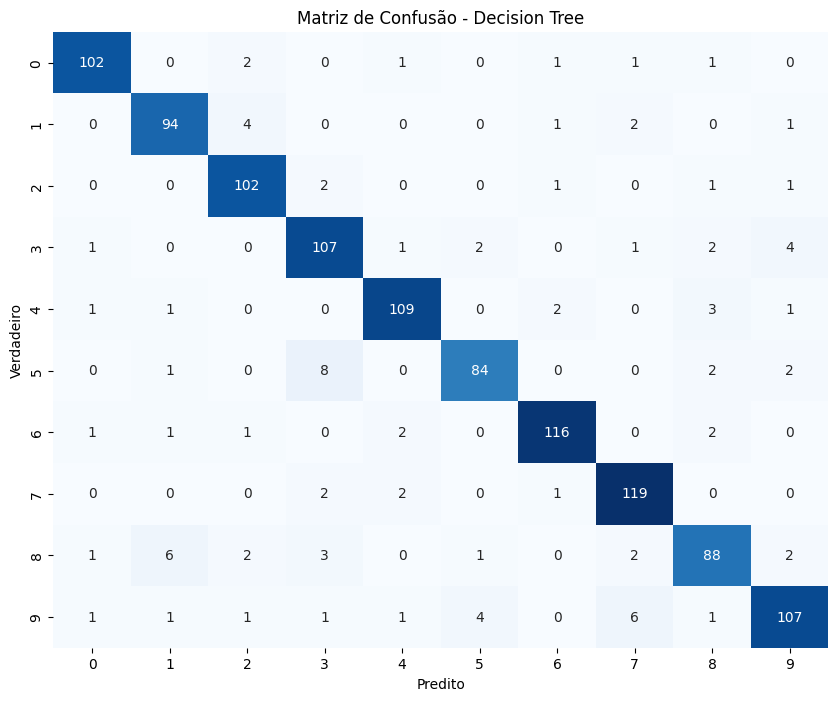

Relatório de Classificação - MLP:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       0.94      1.00      0.97       102
           2       1.00      0.99      1.00       107
           3       0.98      0.97      0.98       118
           4       0.98      0.97      0.98       117
           5       0.96      0.97      0.96        97
           6       0.98      0.97      0.98       123
           7       0.99      0.99      0.99       124
           8       0.97      0.97      0.97       105
           9       0.97      0.93      0.95       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



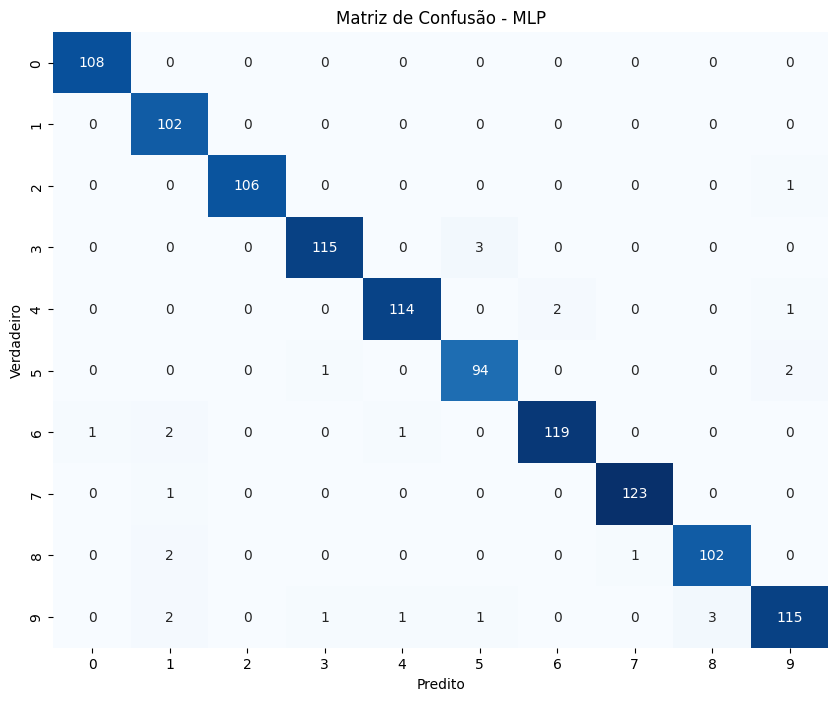

Relatório de Classificação - Naive Bayes:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       108
           1       0.87      0.88      0.88       102
           2       0.97      0.88      0.92       107
           3       0.94      0.92      0.93       118
           4       0.95      0.92      0.94       117
           5       0.97      0.90      0.93        97
           6       0.96      0.98      0.97       123
           7       0.96      0.99      0.98       124
           8       0.82      0.89      0.85       105
           9       0.83      0.89      0.86       123

    accuracy                           0.92      1124
   macro avg       0.93      0.92      0.92      1124
weighted avg       0.93      0.92      0.92      1124



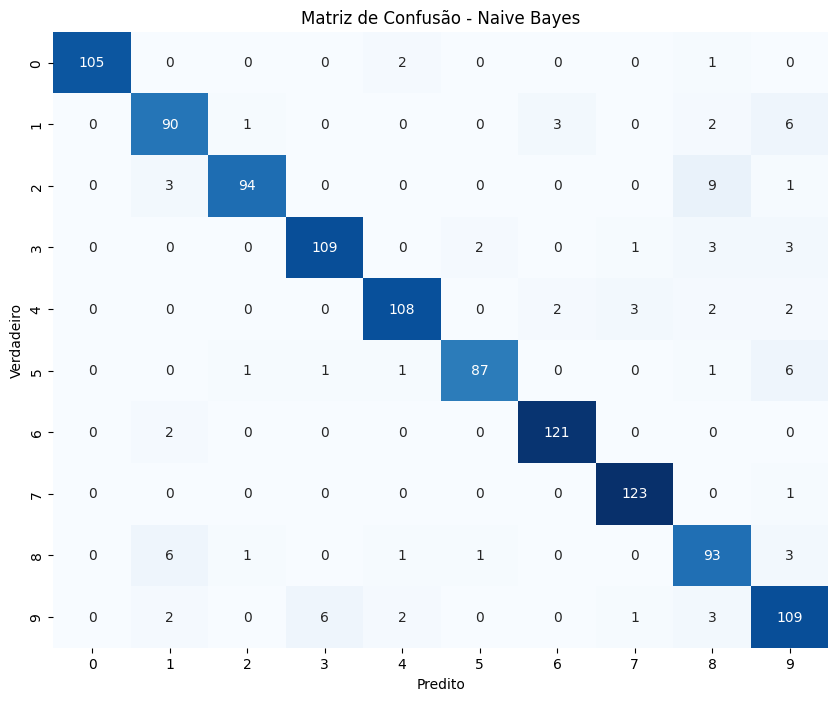

Relatório de Classificação - SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.99      1.00      1.00       102
           2       1.00      1.00      1.00       107
           3       0.98      0.99      0.99       118
           4       1.00      1.00      1.00       117
           5       0.98      1.00      0.99        97
           6       1.00      0.99      1.00       123
           7       0.99      1.00      1.00       124
           8       1.00      1.00      1.00       105
           9       1.00      0.97      0.98       123

    accuracy                           0.99      1124
   macro avg       0.99      1.00      0.99      1124
weighted avg       0.99      0.99      0.99      1124



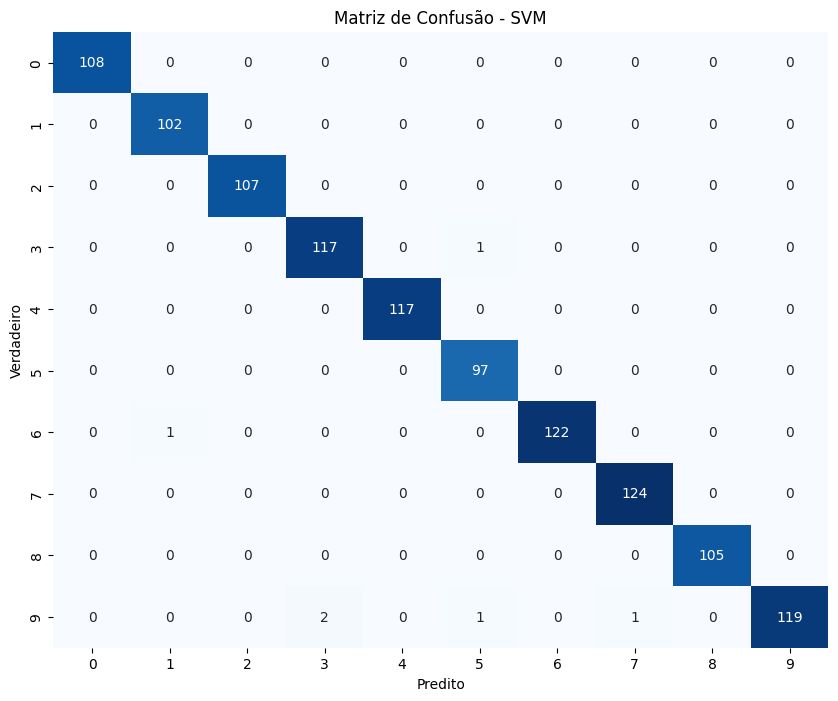

In [ ]:
# Avaliando cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Relatório de Classificação
    print(f"Relatório de Classificação - {model_name}:\n")
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test).astype(str))
    print(report)

    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

# Regiões de decisão de cada modelo
Utilizando apenas 3 classes para melhor análise

## KNN

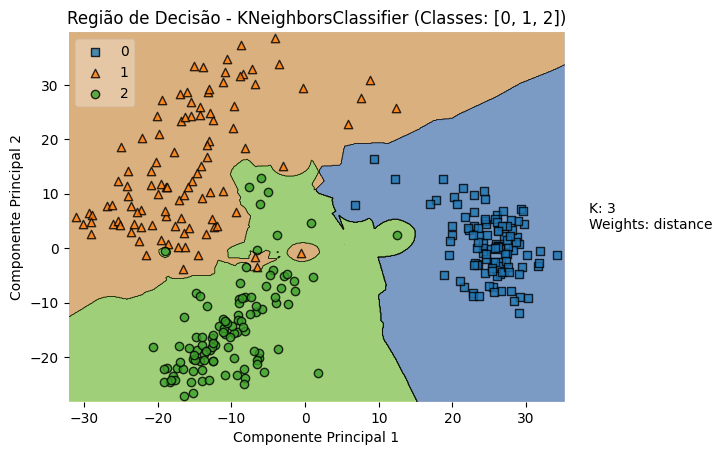

In [ ]:
from sklearn.base import clone
from mlxtend.plotting import plot_decision_regions

def show_decision_region_3classes(X_test, y_test, model, classes_to_plot):
    # Filtrar os dados de teste para incluir apenas as classes desejadas
    mask = y_test.isin(classes_to_plot)
    X_filtered = X_test[mask]
    y_filtered = y_test[mask]

    # Reduzindo os dados filtrados para duas dimensões com PCA
    pca = PCA(n_components=2)
    X_pca_filtered = pca.fit_transform(X_filtered)

    # Treinando o modelo com os dados filtrados e transformados com PCA
    model_pca = clone(model)
    model_pca.fit(X_pca_filtered, y_filtered)

    # Criando uma grade para o plot
    x_min, x_max = X_pca_filtered[:, 0].min() - 1, X_pca_filtered[:, 0].max() + 1
    y_min, y_max = X_pca_filtered[:, 1].min() - 1, X_pca_filtered[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predizendo a classe para cada ponto da grade
    Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a região de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plot_decision_regions(X_pca_filtered, y_filtered.values.flatten(), clf=model_pca, legend=2)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    # Adicionando a legenda com parâmetros do modelo
    k = model.get_params().get('n_neighbors', 'N/A')
    weights = model.get_params().get('weights', 'N/A')
    legenda_texto = f"K: {k}\nWeights: {weights}"
    plt.text(1.05, 0.5, legenda_texto, transform=plt.gca().transAxes, fontsize=10, va='center')

    plt.title(f'Região de Decisão - {model.__class__.__name__} (Classes: {classes_to_plot})')
    plt.show()

# Plotando de acordo com o número de classes desejado
classes_desejadas = [0, 1, 2]
show_decision_region_3classes(X_test, y_test, best_knn, classes_desejadas)

## Decision Tree

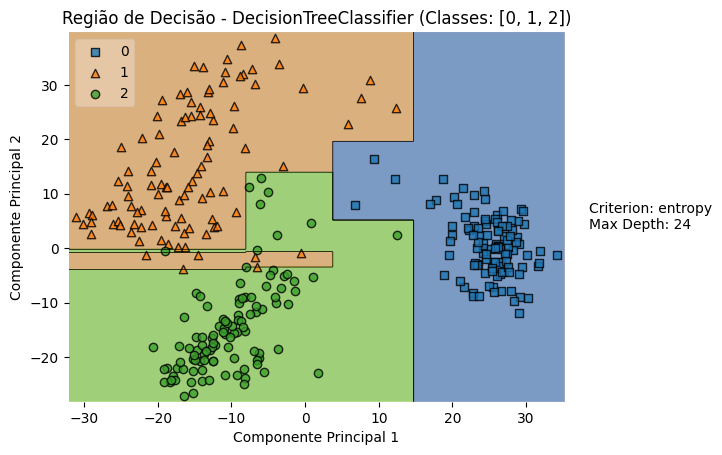

In [ ]:
def show_decision_region_3classes(X_test, y_test, model, classes_to_plot):
    # Filtrar os dados de teste para incluir apenas as classes desejadas
    mask = y_test.isin(classes_to_plot)
    X_filtered = X_test[mask]
    y_filtered = y_test[mask]

    # Reduzindo os dados filtrados para duas dimensões com PCA
    pca = PCA(n_components=2)
    X_pca_filtered = pca.fit_transform(X_filtered)

    # Treinando o modelo com os dados filtrados e transformados com PCA
    model_pca = clone(model)
    model_pca.fit(X_pca_filtered, y_filtered)

    # Criando uma grade para o plot
    x_min, x_max = X_pca_filtered[:, 0].min() - 1, X_pca_filtered[:, 0].max() + 1
    y_min, y_max = X_pca_filtered[:, 1].min() - 1, X_pca_filtered[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predizendo a classe para cada ponto da grade
    Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a região de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plot_decision_regions(X_pca_filtered, y_filtered.values.flatten(), clf=model_pca, legend=2)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    # Adicionando a legenda 'criterion', 'max_depth'
    criterion = model.get_params()['criterion']
    max_depth = model.get_params()['max_depth']
    legenda_texto = f"Criterion: {criterion}\nMax Depth: {max_depth}"
    plt.text(1.05, 0.5, legenda_texto, transform=plt.gca().transAxes, fontsize=10, va='center')

    plt.title(f'Região de Decisão - {model.__class__.__name__} (Classes: {classes_to_plot})')
    plt.show()

# Plotando de acordo com o número de classes desejado
classes_desejadas = [0, 1, 2]
show_decision_region_3classes(X_test, y_test, best_dt, classes_desejadas)

## MLP

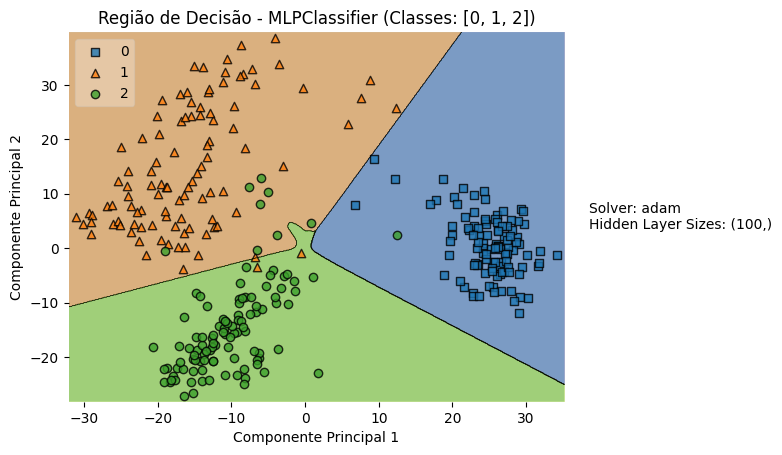

In [ ]:
def show_decision_region_3classes(X_test, y_test, model, classes_to_plot):
    # Filtrar os dados de teste para incluir apenas as classes desejadas
    mask = y_test.isin(classes_to_plot)
    X_filtered = X_test[mask]
    y_filtered = y_test[mask]

    # Reduzindo os dados filtrados para duas dimensões com PCA
    pca = PCA(n_components=2)
    X_pca_filtered = pca.fit_transform(X_filtered)

    # Treinando o modelo com os dados filtrados e transformados com PCA
    model_pca = clone(model)
    model_pca.fit(X_pca_filtered, y_filtered)

    # Criando uma grade para o plot
    x_min, x_max = X_pca_filtered[:, 0].min() - 1, X_pca_filtered[:, 0].max() + 1
    y_min, y_max = X_pca_filtered[:, 1].min() - 1, X_pca_filtered[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predizendo a classe para cada ponto da grade
    Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a região de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plot_decision_regions(X_pca_filtered, y_filtered.values.flatten(), clf=model_pca, legend=2)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    # Adicionando a legenda 'solver', 'hidden_layer_sizes'
    solver = model.get_params()['solver']
    hidden_layer_sizes = model.get_params()['hidden_layer_sizes']
    legenda_texto = f"Solver: {solver}\nHidden Layer Sizes: {hidden_layer_sizes}"
    plt.text(1.05, 0.5, legenda_texto, transform=plt.gca().transAxes, fontsize=10, va='center')

    plt.title(f'Região de Decisão - {model.__class__.__name__} (Classes: {classes_to_plot})')
    plt.show()

# Plotando de acordo com o número de classes desejado
classes_desejadas = [0, 1, 2]
show_decision_region_3classes(X_test, y_test, best_mlp, classes_desejadas)

##Naive Bayes

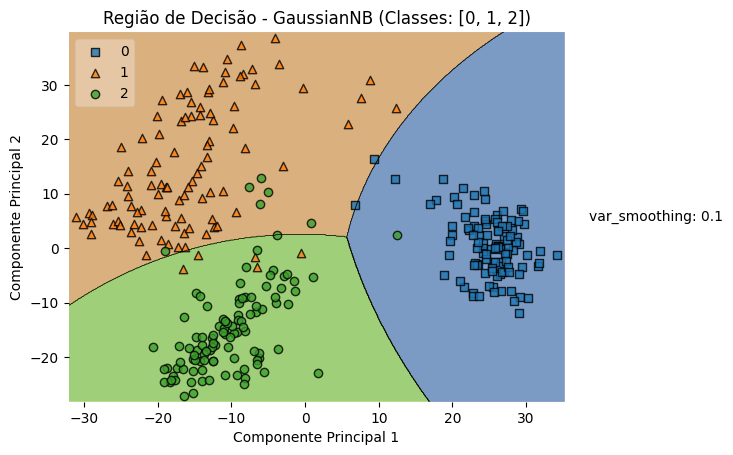

In [ ]:
def show_decision_region_3classes(X_test, y_test, model, classes_to_plot):
    # Filtrar os dados de teste para incluir apenas as classes desejadas
    mask = y_test.isin(classes_to_plot)
    X_filtered = X_test[mask]
    y_filtered = y_test[mask]

    # Reduzindo os dados filtrados para duas dimensões com PCA
    pca = PCA(n_components=2)
    X_pca_filtered = pca.fit_transform(X_filtered)

    # Treinando o modelo com os dados filtrados e transformados com PCA
    model_pca = clone(model)
    model_pca.fit(X_pca_filtered, y_filtered)

    # Criando uma grade para o plot
    x_min, x_max = X_pca_filtered[:, 0].min() - 1, X_pca_filtered[:, 0].max() + 1
    y_min, y_max = X_pca_filtered[:, 1].min() - 1, X_pca_filtered[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predizendo a classe para cada ponto da grade
    Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a região de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plot_decision_regions(X_pca_filtered, y_filtered.values.flatten(), clf=model_pca, legend=2)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    # Adicionando a legenda var_smoothing': 0.1
    var_smoothing = model.get_params()['var_smoothing']
    legenda_texto = f"var_smoothing: {var_smoothing}"
    plt.text(1.05, 0.5, legenda_texto, transform=plt.gca().transAxes, fontsize=10, va='center')

    plt.title(f'Região de Decisão - {model.__class__.__name__} (Classes: {classes_to_plot})')
    plt.show()

# Plotando de acordo com o número de classes desejado
classes_desejadas = [0, 1, 2]
show_decision_region_3classes(X_test, y_test, best_nb, classes_desejadas)

##SVC

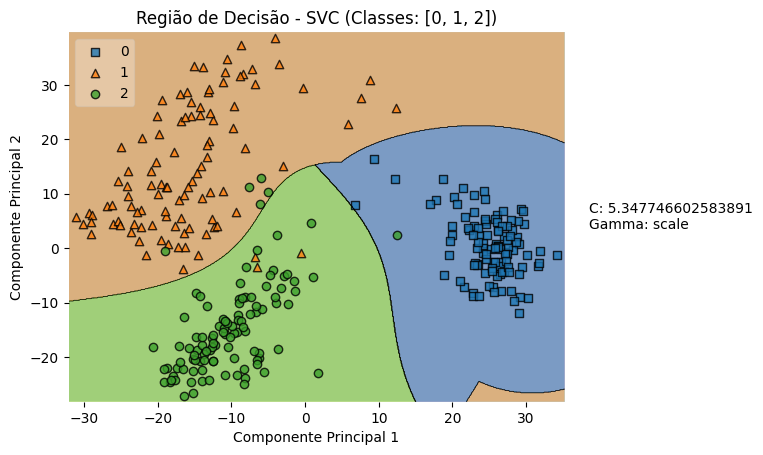

In [ ]:
def show_decision_region_3classes(X_test, y_test, model, classes_to_plot):
    # Filtrar os dados de teste para incluir apenas as classes desejadas
    mask = y_test.isin(classes_to_plot)
    X_filtered = X_test[mask]
    y_filtered = y_test[mask]

    # Reduzindo os dados filtrados para duas dimensões com PCA
    pca = PCA(n_components=2)
    X_pca_filtered = pca.fit_transform(X_filtered)

    # Treinando o modelo com os dados filtrados e transformados com PCA
    model_pca = clone(model)
    model_pca.fit(X_pca_filtered, y_filtered)

    # Criando uma grade para o plot
    x_min, x_max = X_pca_filtered[:, 0].min() - 1, X_pca_filtered[:, 0].max() + 1
    y_min, y_max = X_pca_filtered[:, 1].min() - 1, X_pca_filtered[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predizendo a classe para cada ponto da grade
    Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a região de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plot_decision_regions(X_pca_filtered, y_filtered.values.flatten(), clf=model_pca, legend=2)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    # Adicionando a legenda 'C','gamma'
    C = model.get_params()['C']
    gamma = model.get_params()['gamma']
    legenda_texto = f"C: {C}\nGamma: {gamma}"
    plt.text(1.05, 0.5, legenda_texto, transform=plt.gca().transAxes, fontsize=10, va='center')

    plt.title(f'Região de Decisão - {model.__class__.__name__} (Classes: {classes_to_plot})')
    plt.show()

# Plotando de acordo com o número de classes desejado
classes_desejadas = [0, 1, 2]
show_decision_region_3classes(X_test, y_test, best_svm, classes_desejadas)